Lab report

Assignment Task (Market Basket Analysis)

You are required to apply Apriori and FP-Growth algorithms on the Market_Basket.CSV dataset to
perform association rule mining.

In [7]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
data = pd.read_csv("Market_Basket_Optimisation.csv")
data.head(10)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,eggs,pet food,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.columns

Index(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
       'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
       'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
       'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
       'spinach', 'olive oil'],
      dtype='object')

In [9]:
data.shape

(7500, 20)

In [10]:
data.isnull().values.any()

np.True_

In [11]:
data.isnull().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

Load Dataset and Preprocessing

In [ ]:
# Import libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

# Load dataset
data = pd.read_csv("Market_Basket_Optimisation.csv")
data = data.fillna('#')

# Encoding
te = TransactionEncoder()
te_ary = te.fit_transform(data.values.tolist())
te_ary = te_ary.tolist()
te.columns_

# Create DataFrame
transc_df = pd.DataFrame(te_ary,columns=te.columns_)
transc_df = transc_df.drop('#',axis=1)

 Apply Apriori

In [13]:
ap = apriori(transc_df,min_support=0.01,use_colnames=True)
ap.head(100)

,support,itemsets
0,0.020267,(almonds)
1,0.033200,(avocado)
2,0.010800,(barbecue sauce)
3,0.014267,(black tea)
4,0.011467,(body spray)
...,...,...
95,0.011867,"(pancakes, cake)"
96,0.018133,"(spaghetti, cake)"
97,0.010267,"(cereals, mineral water)"
98,0.011600,"(chocolate, champagne)"


Association rules for apriori

In [14]:
assoc_rules = association_rules(ap, min_threshold=0.3)
assoc_rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(avocado),(mineral water),0.033200,0.238267,0.011467,0.345382,1.449559,1.0,0.003556,1.163629,0.320785,0.044103,0.140620,0.196753
1,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,1.0,0.013127,1.224782,0.499351,0.120941,0.183528,0.245256
2,(cake),(mineral water),0.081067,0.238267,0.027467,0.338816,1.422002,1.0,0.008151,1.152074,0.322947,0.094107,0.132000,0.227046
3,(cereals),(mineral water),0.025733,0.238267,0.010267,0.398964,1.674442,1.0,0.004135,1.267367,0.413425,0.040462,0.210962,0.221026
4,(chicken),(mineral water),0.060000,0.238267,0.022800,0.380000,1.594852,1.0,0.008504,1.228602,0.396790,0.082769,0.186067,0.237846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,"(milk, mineral water)",(spaghetti),0.048000,0.174133,0.015733,0.327778,1.882338,1.0,0.007375,1.228562,0.492380,0.076227,0.186040,0.209065
59,"(olive oil, spaghetti)",(mineral water),0.022933,0.238267,0.010267,0.447674,1.878880,1.0,0.004802,1.379138,0.478747,0.040914,0.274910,0.245382
60,"(olive oil, mineral water)",(spaghetti),0.027467,0.174133,0.010267,0.373786,2.146553,1.0,0.005484,1.318826,0.549222,0.053659,0.241750,0.216373
61,"(pancakes, spaghetti)",(mineral water),0.025200,0.238267,0.011467,0.455026,1.909736,1.0,0.005462,1.397744,0.488682,0.045503,0.284561,0.251576


FPgrowth

In [15]:
fp_g = fpgrowth(transc_df,min_support=0.01,use_colnames=True)
fp_g.head(100)

,support,itemsets
0,0.179733,(eggs)
1,0.087200,(burgers)
2,0.020933,(meatballs)
3,0.062533,(turkey)
4,0.033200,(avocado)
...,...,...
95,0.030933,"(green tea, mineral water)"
96,0.026533,"(green tea, spaghetti)"
97,0.028533,"(green tea, french fries)"
98,0.023467,"(green tea, chocolate)"


Association rules for fpgrowth

In [16]:
assoc_rules = association_rules(fp_g, min_threshold=0.3)
assoc_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,1.0,0.013127,1.224782,0.499351,0.120941,0.183528,0.245256
1,(turkey),(eggs),0.062533,0.179733,0.019467,0.311301,1.732014,1.0,0.008227,1.191037,0.450829,0.087373,0.160396,0.209805
2,(turkey),(mineral water),0.062533,0.238267,0.019200,0.307036,1.288624,1.0,0.004300,1.099240,0.238919,0.068182,0.090280,0.193809
3,(avocado),(mineral water),0.033200,0.238267,0.011467,0.345382,1.449559,1.0,0.003556,1.163629,0.320785,0.044103,0.140620,0.196753
4,(milk),(mineral water),0.129600,0.238267,0.048000,0.370370,1.554436,1.0,0.017121,1.209812,0.409789,0.150063,0.173425,0.285913
5,"(milk, spaghetti)",(mineral water),0.035467,0.238267,0.015733,0.443609,1.861817,1.0,0.007283,1.369061,0.479911,0.060982,0.269572,0.254821
6,"(milk, mineral water)",(spaghetti),0.048000,0.174133,0.015733,0.327778,1.882338,1.0,0.007375,1.228562,0.492380,0.076227,0.186040,0.209065
7,"(chocolate, milk)",(mineral water),0.032133,0.238267,0.014000,0.435685,1.828559,1.0,0.006344,1.349836,0.468165,0.054602,0.259169,0.247221
8,"(chocolate, milk)",(spaghetti),0.032133,0.174133,0.010933,0.340249,1.953957,1.0,0.005338,1.251785,0.504427,0.055973,0.201141,0.201518
9,"(milk, spaghetti)",(chocolate),0.035467,0.163867,0.010933,0.308271,1.881229,1.0,0.005122,1.208758,0.485657,0.058033,0.172705,0.187496


CLP Question 1:

Using Python and seaborn, create a boxplot for the monthly sales of
Department A, given the data: Dept A Sales (in $000): [18, 20, 22, 25, 28,
30, 35]
Then, interpret the boxplot by commenting on the distribution and
whether any outliers are present.

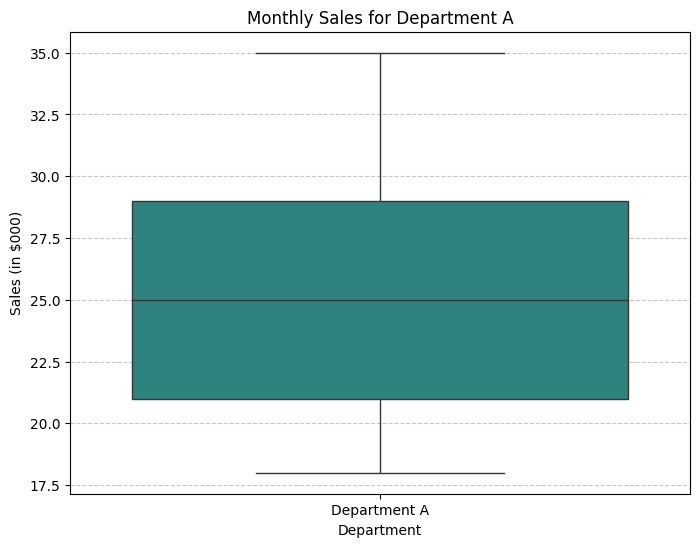

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sales_data = {
    'Department': ['Department A'] * 7,
    'Sales (in $000)': [18, 20, 22, 25, 28, 30, 35]
}
df = pd.DataFrame(sales_data)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Department', y='Sales (in $000)', data=df, palette='viridis', hue='Department', legend=False)
plt.title('Monthly Sales for Department A')
plt.ylabel('Sales (in $000)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

CLP Question 2

You are given the following transaction dataset:

T101 {P, Q, R, S, T, U}
T102 {V, P, Q, S, T, U}
T103 {W, P, Q, R}
T104 {X, Q, R, Y, U}
T105 {X, P, Z, Q, T, T}

The minimum support count is 3.

In [18]:
transactions_data = [
    ['P', 'Q', 'R', 'S', 'T', 'U'],
    ['V', 'P', 'Q', 'S', 'T', 'U'],
    ['W', 'P', 'Q', 'R'],
    ['X', 'Q', 'R', 'Y', 'U'],
    ['X', 'P', 'Z', 'Q', 'T', 'T']
]

print("Transaction dataset initialized successfully:")
print(transactions_data)
print(f"Number of transactions: {len(transactions_data)}")

Transaction dataset initialized successfully:
[['P', 'Q', 'R', 'S', 'T', 'U'], ['V', 'P', 'Q', 'S', 'T', 'U'], ['W', 'P', 'Q', 'R'], ['X', 'Q', 'R', 'Y', 'U'], ['X', 'P', 'Z', 'Q', 'T', 'T']]
Number of transactions: 5


Data Preprocessing

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

# Initialize TransactionEncoder
te = TransactionEncoder()

# One-hot encode the transactions
te_ary = te.fit(transactions_data).transform(transactions_data)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

Apply apriori

In [23]:
# Apply the apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.3, use_colnames=True)

print("Frequent Itemsets (min_support=0.3):")
print(frequent_itemsets)

Frequent Itemsets (min_support=0.3):
    support         itemsets
0       0.8              (P)
1       1.0              (Q)
2       0.6              (R)
3       0.4              (S)
4       0.6              (T)
5       0.6              (U)
6       0.4              (X)
7       0.8           (P, Q)
8       0.4           (R, P)
9       0.4           (S, P)
10      0.6           (T, P)
11      0.4           (U, P)
12      0.6           (R, Q)
13      0.4           (S, Q)
14      0.6           (T, Q)
15      0.6           (U, Q)
16      0.4           (X, Q)
17      0.4           (U, R)
18      0.4           (S, T)
19      0.4           (U, S)
20      0.4           (U, T)
21      0.4        (R, P, Q)
22      0.4        (S, P, Q)
23      0.6        (T, P, Q)
24      0.4        (U, P, Q)
25      0.4        (T, S, P)
26      0.4        (U, S, P)
27      0.4        (T, P, U)
28      0.4        (U, R, Q)
29      0.4        (S, T, Q)
30      0.4        (U, S, Q)
31      0.4        (U, T, Q)
32    

Association rules for apriori

In [27]:
assoc_rules_apriori = association_rules(frequent_itemsets, min_threshold=0.7)
assoc_rules_apriori.head(100)

C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(P),(Q),0.8,1.0,0.8,1.00,1.00,1.0,0.00,inf,0.000000,0.80,0.000,0.900
1,(Q),(P),1.0,0.8,0.8,0.80,1.00,1.0,0.00,1.0,0.000000,0.80,0.000,0.900
2,(S),(P),0.4,0.8,0.4,1.00,1.25,1.0,0.08,inf,0.333333,0.50,1.000,0.750
3,(T),(P),0.6,0.8,0.6,1.00,1.25,1.0,0.12,inf,0.500000,0.75,1.000,0.875
4,(P),(T),0.8,0.6,0.6,0.75,1.25,1.0,0.12,1.6,1.000000,0.75,0.375,0.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(U, S, T)","(P, Q)",0.4,0.8,0.4,1.00,1.25,1.0,0.08,inf,0.333333,0.50,1.000,0.750
96,"(U, T, Q)","(S, P)",0.4,0.4,0.4,1.00,2.50,1.0,0.24,inf,1.000000,1.00,1.000,1.000
97,"(S, P)","(U, T, Q)",0.4,0.4,0.4,1.00,2.50,1.0,0.24,inf,1.000000,1.00,1.000,1.000
98,"(U, P)","(S, T, Q)",0.4,0.4,0.4,1.00,2.50,1.0,0.24,inf,1.000000,1.00,1.000,1.000


Apply fp growth

In [30]:
fp_growth = fpgrowth(df_encoded, min_support=0.3, use_colnames=True)
fp_growth.head(10)

,support,itemsets
0,1.0,(Q)
1,0.8,(P)
2,0.6,(U)
3,0.6,(R)
4,0.6,(T)
5,0.4,(S)
6,0.4,(X)
7,0.8,"(P, Q)"
8,0.6,"(U, Q)"
9,0.4,"(U, P)"


Association rules for fpgrowth

In [31]:
assoc_rules_fp = association_rules(frequent_itemsets, min_threshold=0.3)
assoc_rules_fp.head(10)

C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(P),(Q),0.8,1.0,0.8,1.000000,1.000000,1.0,0.00,inf,0.000000,0.80,0.000000,0.900000
1,(Q),(P),1.0,0.8,0.8,0.800000,1.000000,1.0,0.00,1.0,0.000000,0.80,0.000000,0.900000
2,(R),(P),0.6,0.8,0.4,0.666667,0.833333,1.0,-0.08,0.6,-0.333333,0.40,-0.666667,0.583333
3,(P),(R),0.8,0.6,0.4,0.500000,0.833333,1.0,-0.08,0.8,-0.500000,0.40,-0.250000,0.583333
4,(S),(P),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.50,1.000000,0.750000
5,(P),(S),0.8,0.4,0.4,0.500000,1.250000,1.0,0.08,1.2,1.000000,0.50,0.166667,0.750000
6,(T),(P),0.6,0.8,0.6,1.000000,1.250000,1.0,0.12,inf,0.500000,0.75,1.000000,0.875000
7,(P),(T),0.8,0.6,0.6,0.750000,1.250000,1.0,0.12,1.6,1.000000,0.75,0.375000,0.875000
8,(U),(P),0.6,0.8,0.4,0.666667,0.833333,1.0,-0.08,0.6,-0.333333,0.40,-0.666667,0.583333
9,(P),(U),0.8,0.6,0.4,0.500000,0.833333,1.0,-0.08,0.8,-0.500000,0.40,-0.250000,0.583333
